In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.3)

# Bussiness Understanding

- casual user: 20 USD / hour
- registerd user: 5 USD / hour
- taxes: 14%
- logistics: 3000$ /year

analyze profit
<br>
predict profit on an hour

In [2]:
df = pd.read_csv('bikes.csv')
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


In [4]:
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count
count,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000
mean,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132
std,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df['weather'].unique()

array(['Clear', nan, 'Mist', 'Rainy', 'Snowy'], dtype=object)

In [6]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129


In [7]:
def calc_profit(row):
    cash = row['casual'] * 20 + row['registered'] * 5
    cash_w_tax = cash - (cash * 0.14)
    logistics_per_hour = 3000 / (365 * 24)
    net_profit = cash_w_tax - logistics_per_hour
    return net_profit

df['Profit'] = df.apply(calc_profit, axis=1)
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.157534
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,274.857534
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.757534
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.257534
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,3.957534
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.757534
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1164.957534
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.657534
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.157534


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
 11  Profit              10886 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1020.7+ KB


In [9]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  Profit              10886 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 1020.7+ KB


In [10]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.157534
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,274.857534
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.757534
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.257534
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,3.957534
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.757534
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1164.957534
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.657534
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.157534


In [11]:
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day_name()

In [12]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,hour,day
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.157534,0,Saturday
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,274.857534,1,Saturday
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.757534,2,Saturday
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.257534,3,Saturday
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,3.957534,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.757534,19,Wednesday
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1164.957534,20,Wednesday
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.657534,21,Wednesday
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.157534,22,Wednesday


In [13]:
df.isna().sum()

datetime                 0
season                 214
holiday                856
workingday            1498
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
Profit                   0
hour                     0
day                      0
dtype: int64

In [14]:
df.shape[0]

10886

In [15]:
df.isna().sum() / df.shape[0] * 100

datetime               0.000000
season                 1.965828
holiday                7.863311
workingday            13.760794
weather               19.658277
temp                  25.555760
humidity              31.453243
windspeed             37.350726
casual                 0.000000
registered             0.000000
rented_bikes_count     0.000000
Profit                 0.000000
hour                   0.000000
day                    0.000000
dtype: float64

In [16]:
df.drop('windspeed', axis=1, inplace=True)

In [17]:
df.dropna(inplace=True)

In [18]:
# from sklearn.impute import SimpleImputer, KNNImputer

# df['holiday'].fillna(0.0, inplace=True)
# df['workingday'].fillna(0.0, inplace=True)

# imputer = SimpleImputer(strategy='most_frequent')

# df['season'] = imputer.fit_transform(df[['season']])
# df['weather'] = imputer.fit_transform(df[['weather']])

# imputer = KNNImputer()

# df['temp'] = imputer.fit_transform(df[['temp']])
# df['humidity'] = imputer.fit_transform(df[['humidity']])

In [19]:
df.isna().sum()

datetime              0
season                0
holiday               0
workingday            0
weather               0
temp                  0
humidity              0
casual                0
registered            0
rented_bikes_count    0
Profit                0
hour                  0
day                   0
dtype: int64

In [20]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'casual', 'registered', 'rented_bikes_count', 'Profit',
       'hour', 'day'],
      dtype='object')

In [21]:
# from datasist.structdata import detect_outliers

# idx = detect_outliers(df, 0, ['temp', 'humidity', 'casual', 'registered', 'rented_bikes_count', 'Profit'])
# df.drop(idx, axis=0, inplace=True)

In [22]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,casual,registered,rented_bikes_count,Profit,hour,day
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,3,13,16,107.157534,0,Saturday
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,3,10,13,94.257534,3,Saturday
10,2011-01-01 10:00:00,Spring,0.0,0.0,Clear,15.58,76.0,12,24,36,309.257534,10,Saturday
14,2011-01-01 14:00:00,Spring,0.0,0.0,Mist,18.86,72.0,35,71,106,906.957534,14,Saturday
15,2011-01-01 15:00:00,Spring,0.0,0.0,Mist,18.04,77.0,40,70,110,988.657534,15,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10857,2012-12-18 19:00:00,Winter,0.0,1.0,Clear,15.58,46.0,19,334,353,1762.657534,19,Tuesday
10862,2012-12-19 00:00:00,Winter,0.0,1.0,Clear,12.30,61.0,6,35,41,253.357534,0,Wednesday
10873,2012-12-19 11:00:00,Winter,0.0,1.0,Clear,16.40,54.0,31,169,200,1259.557534,11,Wednesday
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,7,329,336,1534.757534,19,Wednesday


# EDA Questions

1. How much the company gain in each hour.
2. How much the company gain in each weekday.
3. How much the company gain in each weather.

In [23]:
df.groupby('hour').sum()['Profit'].sort_values(ascending=False)

hour
17    410410.952055
18    408832.357534
16    319354.152055
12    313362.920548
14    286933.369863
13    286675.369863
19    286502.684932
15    283489.412329
11    264871.478082
8     245238.324658
20    200627.384932
9     183403.106849
10    179006.642466
21    155706.997260
7     150936.584932
22    114907.912329
23     82820.284932
6      58176.300000
0      46529.121918
1      35754.387671
2      25371.447945
5      14058.109589
3      12692.612329
4       5889.327397
Name: Profit, dtype: float64

<AxesSubplot:xlabel='hour', ylabel='Profit'>

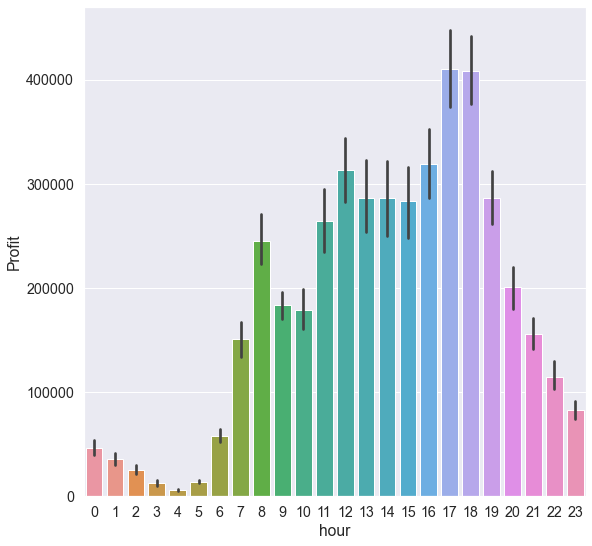

In [24]:
sns.barplot(x='hour', y='Profit', data=df, estimator=np.sum)

<AxesSubplot:xlabel='day', ylabel='Profit'>

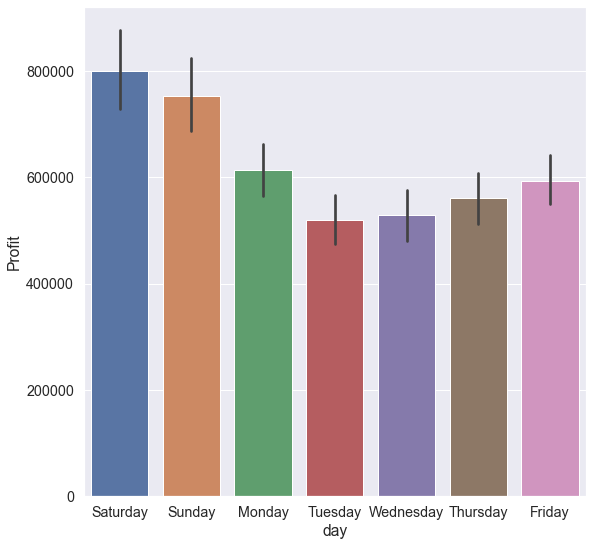

In [25]:
sns.barplot(x='day', y='Profit', data=df, estimator=np.sum)

<AxesSubplot:xlabel='weather', ylabel='Profit'>

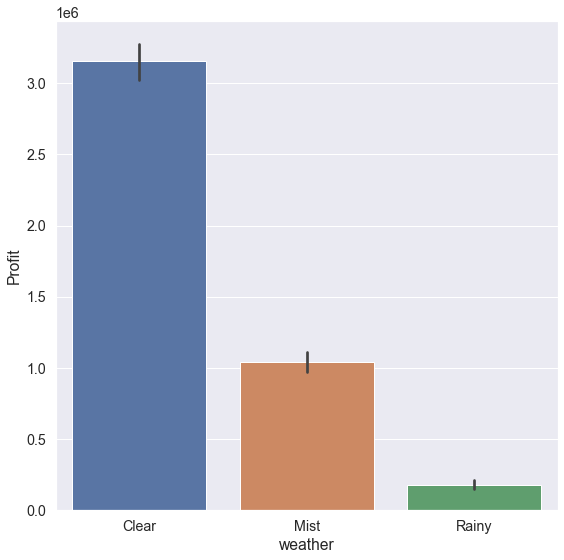

In [26]:
sns.barplot(x='weather', y='Profit', data=df, estimator=np.sum)

In [27]:
df.drop(['datetime', 'casual', 'registered', 'rented_bikes_count'], axis=1, inplace=True)

In [28]:
df

,season,holiday,workingday,weather,temp,humidity,Profit,hour,day
0,Spring,0.0,0.0,Clear,9.84,81.0,107.157534,0,Saturday
3,Spring,0.0,0.0,Clear,9.84,75.0,94.257534,3,Saturday
10,Spring,0.0,0.0,Clear,15.58,76.0,309.257534,10,Saturday
14,Spring,0.0,0.0,Mist,18.86,72.0,906.957534,14,Saturday
15,Spring,0.0,0.0,Mist,18.04,77.0,988.657534,15,Saturday
...,...,...,...,...,...,...,...,...,...
10857,Winter,0.0,1.0,Clear,15.58,46.0,1762.657534,19,Tuesday
10862,Winter,0.0,1.0,Clear,12.30,61.0,253.357534,0,Wednesday
10873,Winter,0.0,1.0,Clear,16.40,54.0,1259.557534,11,Wednesday
10881,Winter,0.0,1.0,Clear,15.58,50.0,1534.757534,19,Wednesday


In [29]:
df.shape[0] * 0.25

857.5

In [30]:
df = pd.get_dummies(df, columns=['season', 'weather', 'day'], drop_first=True)
df

,holiday,workingday,temp,humidity,Profit,hour,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,0.0,0.0,9.84,81.0,107.157534,0,1,0,0,0,0,0,1,0,0,0,0
3,0.0,0.0,9.84,75.0,94.257534,3,1,0,0,0,0,0,1,0,0,0,0
10,0.0,0.0,15.58,76.0,309.257534,10,1,0,0,0,0,0,1,0,0,0,0
14,0.0,0.0,18.86,72.0,906.957534,14,1,0,0,1,0,0,1,0,0,0,0
15,0.0,0.0,18.04,77.0,988.657534,15,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10857,0.0,1.0,15.58,46.0,1762.657534,19,0,0,1,0,0,0,0,0,0,1,0
10862,0.0,1.0,12.30,61.0,253.357534,0,0,0,1,0,0,0,0,0,0,0,1
10873,0.0,1.0,16.40,54.0,1259.557534,11,0,0,1,0,0,0,0,0,0,0,1
10881,0.0,1.0,15.58,50.0,1534.757534,19,0,0,1,0,0,0,0,0,0,0,1


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = df.drop('Profit', axis=1)
y = df['Profit']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
df['Profit'].describe()

count    3430.000000
mean     1274.504735
std      1308.196091
min         3.957534
25%       253.357534
50%       868.257534
75%      1874.457534
max      7795.557534
Name: Profit, dtype: float64

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'LR': LinearRegression(),
    'DT': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(), 
    'RF': RandomForestRegressor(),
    'XGB': XGBRegressor()
}

for name, model in models.items():
    print(f'Traing {name}...')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_tr = model.predict(x_train)
    print(f'Training RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_tr))}')
    print(f'Training MAE: {mean_absolute_error(y_train, y_pred_tr)}')
    print(f'Training R2: {r2_score(y_train, y_pred_tr)}')
    print('++++++')
    print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'Testing R2: {r2_score(y_test, y_pred)}')
    print('-'*50)

Traing LR...
Training RMSE: 965.2351023322267
Training MAE: 722.1771478644184
Training R2: 0.4514605600312539
++++++
Testing RMSE: 998.3641731011628
Testing MAE: 729.785628045638
Testing R2: 0.42896145190885526
--------------------------------------------------
Traing DT...
Training RMSE: 30.97102992782202
Training MAE: 1.2455287713841372
Training R2: 0.9994352542909329
++++++
Testing RMSE: 768.1592498533089
Testing MAE: 489.41317016317015
Testing R2: 0.6619429634898661
--------------------------------------------------
Traing KNN...
Training RMSE: 632.7363870414868
Training MAE: 425.8126827371695
Training R2: 0.7642849758283465
++++++
Testing RMSE: 832.0783432105978
Testing MAE: 559.7978554778556
Testing R2: 0.6033423009853135
--------------------------------------------------
Traing SVM...
Training RMSE: 1335.2170840964216
Training MAE: 919.507004971931
Training R2: -0.0496521631384228
++++++
Testing RMSE: 1370.6717221416739
Testing MAE: 948.3017269206949
Testing R2: -0.0763520868290

In [38]:
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
x.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'hour', 'season_Spring',
       'season_Summer', 'season_Winter', 'weather_Mist', 'weather_Rainy',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday'],
      dtype='object')

In [41]:
custom_data = [1, 0, 10.9, 70, 17, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
custom_data = scaler.transform([custom_data])

In [44]:
predicted_profit = model.predict(custom_data)[0]
print(f'Predict profit is: {predicted_profit}')

Predict profit is: 1655.5772705078125
